In [1]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import time
import datetime

from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup


In [2]:
driver = webdriver.Chrome()
url = 'https://inshorts.com/en/read'
driver.get(url)

In [3]:
print(driver.page_source)

<html lang="en" class="wf-roboto-n3-active wf-roboto-n4-active wf-active"><head><meta charset="utf-8"><link rel="dns-prefetch" href="https://ajax.googleapis.com"><link rel="dns-prefetch" href="https://assets.inshorts.com"><link rel="dns-prefetch" href="https://static.inshorts.com"><link rel="dns-prefetch" href="https://cdn.ampproject.org"><meta name="theme-color" content="#ffffff"><link rel="shortcut icon" href="/assets/images/favicon.png" type="image/x-icon"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta http-equiv="X-UA-Compatible" content="IE=edge"><link rel="icon" sizes="192x192" href="/assets/images/logo_192.png"><link href="https://inshorts.com" rel="canonical">
  <link href="https://inshorts.com" rel="alternate">
  <meta name="description" content="read latest news with inshorts in less than 60 words related to business sports bollywood and technology in india and around the world in bot

In [4]:
soup = BeautifulSoup(driver.page_source,'html5lib')
print(soup)
print(soup.encode('utf-8'))

<html class="wf-roboto-n3-active wf-roboto-n4-active wf-active" lang="en"><head><meta charset="utf-8"/><link href="https://ajax.googleapis.com" rel="dns-prefetch"/><link href="https://assets.inshorts.com" rel="dns-prefetch"/><link href="https://static.inshorts.com" rel="dns-prefetch"/><link href="https://cdn.ampproject.org" rel="dns-prefetch"/><meta content="#ffffff" name="theme-color"/><link href="/assets/images/favicon.png" rel="shortcut icon" type="image/x-icon"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="width=device-width,initial-scale=1" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><link href="/assets/images/logo_192.png" rel="icon" sizes="192x192"/><link href="https://inshorts.com" rel="canonical"/>
  <link href="https://inshorts.com" rel="alternate"/>
  <meta content="read latest news with inshorts in less than 60 words related to business sports bollywood and technology in india and around the world in both engl

In [5]:
result = soup.findAll("div", {"class" : "VdsPqrmJYY7F2MNUKOwQ"})
print(result)

[<div class="VdsPqrmJYY7F2MNUKOwQ"><div><div><div><span class="S2DdZEgzkqC9bYeTJUGw" itemprop="headline">Pics show cricketers at annual BCCI awards</span></div><div class="njwxOAklpbTYvII3gDje"><a href="/prev/en/news/pics-show-cricketers-at-annual-bcci-awards-1706029964464"><span class="ZqxLswYEeBP5GMgGIxlT">short</span></a> by <span class="author">Anmol Sharma</span> /<span content="2024-01-23T17:12:44.000Z" itemprop="datePublished"> 10:42 pm</span> on <span class="date">Tuesday, 23 January, 2024</span></div></div><div><div class="Hxtmf9GvkV8Ti6V0GUSn" itemprop="articleBody">The BCCI’s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.</div></div></div><div><div class="c80ZAVi5M80kecYskLY3">read more at <a class="afA2Wlcd6bZojC

In [6]:
type(result)

bs4.element.ResultSet

#### article_body = each_new.find("div", {"itemprop" : "articleBody"}).get_text() headline = each_news.find('span", {"itemprop" : "headline"}).get_text()

##### df = pd.DataFrame(columns = ['Headline','Author','Description'])df

In [7]:
pages = np.arange(1,50)
new=[]

for page in pages:
    soup = BeautifulSoup(driver.page_source, 'html5lib')
    result = soup.findAll("div", {"class" : "VdsPqrmJYY7F2MNUKOwQ"})
    for i in result:
           ##Title
        title = i.find('span', class_ = "S2DdZEgzkqC9bYeTJUGw")
        title = title.text
        print(title.encode('utf-8'))
        # Author
        author = i.find('span', class_='author')
        author = author.text
        print(author.encode("utf-8"))
        
        #Description
        description = i.find('div', class_="Hxtmf9GvkV8Ti6V0GUSn")
        description = description.text
        print(description.encode('utf-8'))
        
        new.append([title, author, description])

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Former Karnataka CM Veerappa Moily has questioned the 11-day fast that PM Narendra Modi undertook for the Ram Temple event. "During my morning walk, I asked a doctor and he claimed that a person can\'t survive by fasting for that long," he said. "If he entered Garbhagriha of Ram Temple without fasting, it has become impure," the former CM added. '
b"Pics show UP's Republic Day tableau featuring Ram Lalla idol"
b'Arshiya Chopra'
b"Uttar Pradesh's tableau featuring an idol of Ram Lalla will be showcased at the Republic Day Parade this year. The tableau also features two sadhus with 'kalash' symbol, emblematic of Magh Mela in Prayagraj and Mahakumbh in 2025, stated an official release. The theme for the tableaux at the Republic Day Parade 2024 is Bharat- The Mother of Democracy."
b"'To Kill A Tiger' documentary on 13-yr-old girl's gangrape in Jharkhand nominated for Oscars"
b'Anmol Sharma'
b"A documentary titled 'To Kill A Tiger', which is based on gangrape of a 13-year-old girl in Jhar

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

b'Pics show cricketers at annual BCCI awards'
b'Anmol Sharma'
b'The BCCI\xe2\x80\x99s annual awards were held in Hyderabad on Tuesday. Several cricketers and former cricketers attended the ceremony. Ravi Shastri and Farokh Engineer were honoured with the Col CK Nayudu Lifetime Achievement Award at the ceremony hosted by Harsha Bhogle. Players were given awards in several categories at the event.'
b'19 children awarded PM Rashtriya Bal Puraskar; pic released'
b'Arshiya Chopra'
b"President Droupadi Murmu awarded 'Pradhan Mantri Rashtriya Bal Puraskar' to 19 children. This year's awardees include one child each in Bravery, Science & Technology and Innovation categories, four in Social Service category, five in Sports category and seven in Art & Culture category. Aaditya Vijay Bramhane has been conferred the award for bravery posthumously."
b"Which players received Best International Cricketer award at BCCI's event today?"
b'Anmol Sharma'
b"During the BCCI's Naman 2024 award event on Tuesd

In [8]:
type(new)

list

In [9]:
len(new)

735

In [10]:
col = ['Headline', "Author", "Description"]

In [11]:
finaldata = pd.DataFrame(new, columns=col)
finaldata

,Headline,Author,Description
0,Pics show cricketers at annual BCCI awards,Anmol Sharma,The BCCI’s annual awards were held in Hyderaba...
1,19 children awarded PM Rashtriya Bal Puraskar;...,Arshiya Chopra,President Droupadi Murmu awarded 'Pradhan Mant...
2,Which players received Best International Cric...,Anmol Sharma,During the BCCI's Naman 2024 award event on Tu...
3,Visuals show long line of devotees at Ram Mandir,Arshiya Chopra,Visuals showing a long queue of devotees waiti...
4,Bihar ex-CM Karpoori Thakur awarded Bharat Rat...,Deepika Bhatt,Two-time Bihar CM Karpoori Thakur will be conf...
...,...,...,...
730,Pic shows Ram Lalla idol in white marble which...,Deepika Bhatt,A picture of the Ram Lalla idol which was amon...
731,Which are the Best Picture nominees at Oscars ...,Anmol Sharma,As many as 10 movies have been nominated for B...
732,Hindu Temple In Vietnam - Po Nagar Temple In N...,System User,A temple originally dedicated to Goddess Durga...
733,"Lord Ram's idol found broken in temple in UP, ...",Arshiya Chopra,Police were deployed in a village in Uttar Pra...


In [12]:
finaldata.shape

(735, 3)

In [13]:
import os


In [14]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     735 non-null    object
 1   Author       735 non-null    object
 2   Description  735 non-null    object
dtypes: object(3)
memory usage: 17.4+ KB


In [15]:
finaldata.isnull().sum()

Headline       0
Author         0
Description    0
dtype: int64

In [16]:
data = pd.DataFrame(finaldata)
data.head()

,Headline,Author,Description
0,Pics show cricketers at annual BCCI awards,Anmol Sharma,The BCCI’s annual awards were held in Hyderaba...
1,19 children awarded PM Rashtriya Bal Puraskar;...,Arshiya Chopra,President Droupadi Murmu awarded 'Pradhan Mant...
2,Which players received Best International Cric...,Anmol Sharma,During the BCCI's Naman 2024 award event on Tu...
3,Visuals show long line of devotees at Ram Mandir,Arshiya Chopra,Visuals showing a long queue of devotees waiti...
4,Bihar ex-CM Karpoori Thakur awarded Bharat Rat...,Deepika Bhatt,Two-time Bihar CM Karpoori Thakur will be conf...


In [17]:
data.shape

(735, 3)

In [18]:
data.iloc[256,0]

'19 children awarded PM Rashtriya Bal Puraskar; pic released'

In [19]:
import warnings
warnings.filterwarnings("ignore")

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning or Pre-Processing

### Step 1:- Lower Case 

In [20]:
data.Headline = data.Headline.str.lower()
data.Headline

0             pics show cricketers at annual bcci awards
1      19 children awarded pm rashtriya bal puraskar;...
2      which players received best international cric...
3       visuals show long line of devotees at ram mandir
4      bihar ex-cm karpoori thakur awarded bharat rat...
                             ...                        
730    pic shows ram lalla idol in white marble which...
731    which are the best picture nominees at oscars ...
732    hindu temple in vietnam - po nagar temple in n...
733    lord ram's idol found broken in temple in up, ...
734    who are the best actor and best actress nomine...
Name: Headline, Length: 735, dtype: object

In [21]:
data.iloc[256,0]

'19 children awarded pm rashtriya bal puraskar; pic released'

### Remove url 

- \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
- (+) == one or more occurance

In [22]:
data.Headline = data.Headline.str.replace(r'http\S+\www.\S+','', case=False, regex=True)
data.iloc[256,0]

'19 children awarded pm rashtriya bal puraskar; pic released'

## Step2 :- Punctuation 

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punctuation(abc):
    text_nopunt = "". join([c
                            for c in abc
                            if c not in string.punctuation])
    return text_nopunt

In [25]:
data.iloc[256,0]

'19 children awarded pm rashtriya bal puraskar; pic released'

In [26]:
data.Headline = data.Headline.apply(lambda x : remove_punctuation(x)) 

In [27]:
data.iloc[256,0]

'19 children awarded pm rashtriya bal puraskar pic released'

### Remove Number

In [28]:
data.iloc[256,0]

'19 children awarded pm rashtriya bal puraskar pic released'

In [29]:
data['Headline'] = data['Headline'].str.replace('\d+','',regex=True)  # data.text  or data['text']

In [30]:
data.iloc[256,0]

' children awarded pm rashtriya bal puraskar pic released'

## Removing Stop Words 

In [31]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
data.iloc[256,0]

' children awarded pm rashtriya bal puraskar pic released'

In [33]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['Headline'] = data['Headline'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [34]:
data.iloc[256,0]

'children awarded pm rashtriya bal puraskar pic released'

## Common Words
- manually created as per the case study

In [35]:
data.iloc[256,0]

'children awarded pm rashtriya bal puraskar pic released'

In [36]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'greenockite',
 'repealist',
 'archphilosopher',
 'undergo',
 'microseismometrograph',
 'sparringly',
 'viticulture',
 'eking',
 'anarchist',
 'flaccidly',
 'echinulation',
 'erethitic',
 'mileway',
 'redeclare',
 'testatum',
 'noveletty',
 'artarine',
 'stokehole',
 'steprelationship',
 'unparticularized',
 'thumlungur',
 'hospitableness',
 'Johnathan',
 'ooscope',
 'unmasticable',
 'homoeocrystalline',
 'oppilate',
 'impersonalization',
 'naufragous',
 'unconcludingness',
 'remigate',
 'carnotite',
 'Alexis',
 'frowze',
 'corticated',
 'Pericles',
 'tole',
 'Wapato',
 'Aspalax',
 'pitiably',
 'noncoloring',
 'preguess',
 'antiholiday',
 'nonrestriction',
 'unthorny',
 'merycismus',
 'progymnosperm',
 'gastronomically',
 'unbadged',
 'justifiable',
 'corn',
 'stylize',
 'counterfoil',
 'broch',
 'desmodont',
 'estreat',
 'flamboyant',
 'slangish',
 'Vermilingues',
 'superdebt',
 'sharply',
 'despitefully',
 'Collins',
 'garneter',
 'sidesplittingly',
 'pelleted',
 'fusain',
 'Eucosia

In [37]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [38]:
data.iloc[256,0]

'children awarded pm rashtriya bal puraskar pic released'

In [39]:
data = pd.DataFrame(data.Headline.apply(lambda x: clean_text_round2(x)))
data.iloc[256,0]

'bal pic'

##  Lemmatization

In [40]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [42]:
data.iloc[256,0]

'bal pic'

In [43]:
data.Headline = data.Headline.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[256,0]

'bal pic'

## Strip extra whitespace 

In [44]:
data['Headline'] = (data['Headline'].astype("str").str.rstrip())
data.iloc[256,0]


'bal pic'

## Removing Duplicate Row

In [45]:
data.head()

,Headline
0,show annual
1,bal pic
2,receive best international cricketer award eve...
3,show long line ram
4,thakur eve birth anniversary


In [46]:
#data = data.drop_duplicates('Headline')
#data

## Finished Data Cleaning 

## Term Document Matrix

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.Headline)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
actor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
actress,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
anniversary,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
annual,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
award,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,726,727,728,729,730,731,732,733,734,freq
0,actor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,49
1,actress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,49
2,anniversary,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
3,annual,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49
4,award,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49


In [49]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(10)

,Word,freq
33,temple,294
28,ram,294
7,best,196
17,idol,147
26,pic,98
15,event,98
11,day,98
0,actor,49
29,receive,49
24,nominate,49


## Word Cloud

In [50]:
Headline = " ".join(review for review in data.Headline)
print ("There are {} words in the combination of all review.".format(len(Headline)))

There are 19354 words in the combination of all review.


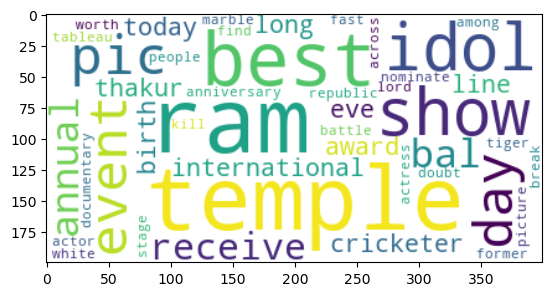

In [51]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(Headline)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
 

## Sentiment Analysis 

In [52]:
data

,Headline
0,show annual
1,bal pic
2,receive best international cricketer award eve...
3,show long line ram
4,thakur eve birth anniversary
...,...
730,pic ram idol white marble among ram temple
731,best picture
732,temple temple
733,lord idol find break temple people stage


In [53]:
data.shape

(735, 1)

In [54]:
from textblob import TextBlob

data['polarity'] = data['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,Headline,polarity
0,show annual,0.00
1,bal pic,0.00
2,receive best international cricketer award eve...,0.50
3,show long line ram,-0.05
4,thakur eve birth anniversary,0.00


In [55]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,Headline,polarity,Sentiment
0,show annual,0.00,Positive
1,bal pic,0.00,Positive
2,receive best international cricketer award eve...,0.50,Positive
3,show long line ram,-0.05,Negative
4,thakur eve birth anniversary,0.00,Positive


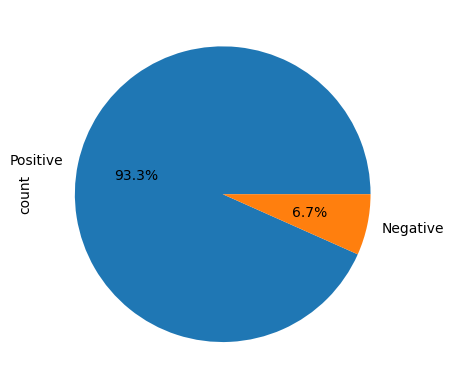

In [56]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

## Finish

## TF-IDF
- Term frequency - inverse document frequency

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word') 
 
# just send in all your docs here 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(data.Headline)

feature_names = cv.get_feature_names_out()  ## EVERY WORD NAME
abc=tfidf_vectorizer_vectors.transpose()

output = pd.DataFrame.sparse.from_spmatrix(tfidf_vectorizer_vectors,
                                          columns=cv.get_feature_names_out())

In [58]:
output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names)
output.reset_index(inplace=True)
output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
output

,Word,0,1,2,3,4,5,6,7,8,...,725,726,727,728,729,730,731,732,733,734
0,actor,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.500445
1,actress,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.500445
2,anniversary,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,annual,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,award,0.0,0.000000,0.402840,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,bal,0.0,0.775226,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
6,battle,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.707107,0.000000,0.000000,...,0.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
7,best,0.0,0.000000,0.284344,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.576664,0.0,0.000000,0.706476
8,birth,0.0,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
9,break,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.455441,0.000000


In [59]:
output['TF*IDF'] = output.drop(['Word'],axis=1).max(axis=1)

In [60]:
#output['TF*IDF'] = output.max(axis=1)
output=output[["Word","TF*IDF"]] #SUBSET OF 2 COLUMNS
output.sort_values(by='TF*IDF',ascending=False,inplace=True) # SORTING DATA 
output.head(20)

,Word,TF*IDF
33,temple,1.000000
3,annual,1.000000
27,picture,0.816981
5,bal,0.775226
38,worth,0.707107
6,battle,0.707107
28,ram,0.707107
7,best,0.706476
21,long,0.656143
20,line,0.656143


In [61]:
tfidf_vectorizer_vectors

<735x39 sparse matrix of type '<class 'numpy.float64'>'
	with 2646 stored elements in Compressed Sparse Row format>

In [62]:
output

,Word,TF*IDF
33,temple,1.000000
3,annual,1.000000
27,picture,0.816981
5,bal,0.775226
38,worth,0.707107
6,battle,0.707107
28,ram,0.707107
7,best,0.706476
21,long,0.656143
20,line,0.656143


In [63]:
data

,Headline,polarity,Sentiment
0,show annual,0.00,Positive
1,bal pic,0.00,Positive
2,receive best international cricketer award eve...,0.50,Positive
3,show long line ram,-0.05,Negative
4,thakur eve birth anniversary,0.00,Positive
...,...,...,...
730,pic ram idol white marble among ram temple,0.00,Positive
731,best picture,1.00,Positive
732,temple temple,0.00,Positive
733,lord idol find break temple people stage,0.00,Positive


In [68]:
data.Sentiment.value_counts(normalize=True)

Sentiment
Positive    0.933333
Negative    0.066667
Name: proportion, dtype: float64

In [ ]:
data.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
Quan_var = data.select_dtypes(include=[np.number])
Quan_var.head(3)

In [ ]:
Qaul_var = data.select_dtypes(include=['object'])
Qaul_var.head(3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Qaul_var = Qaul_var.apply(LabelEncoder().fit_transform)
Qaul_var

In [ ]:
Combined = pd.concat([Quan_var,Qaul_var], axis=1)
Combined.head()

In [ ]:
x = Combined.drop('Sentiment', axis=1)
y = Combined[['Sentiment']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=50)


In [ ]:
X_train.shape

### Model Building

### Decision Tree 

In [ ]:
params = { 'min_samples_split': [300,399,250,450], ## Parent 
           'min_samples_leaf': [60,70,90,100,50], ## Child or Leave 
           'max_depth':[3,4,6]} 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
ab = grid_search_cv.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(**ab)  # by default it use Gini index for split
Model_dt.fit(X_train,y_train)  

In [ ]:
y_pred_train_DT = Model_dt.predict(X_train)
y_pred_test_DT = Model_dt.predict(X_test)

In [ ]:
train['Prediction'] = Model_dt.predict(X_train)
train

In [ ]:
test['Prediction'] = Model_dt.predict(X_test)
test

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report on train(Decision Tree :")
print(classification_report(train['Sentiment'], train['Prediction']))

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report on test(Decision Tree :")
print(classification_report(test['Sentiment'], test['Prediction']))

### Random Forest

In [ ]:
params = { 'min_samples_split': [300,399,250,450], ## Parent 
           'min_samples_leaf': [60,70,90,100,50], ## Child or Leave 
           'max_depth':[3,4,6]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
gridcv_rm = GridSearchCV(RandomForestClassifier(),
                         params,
                         verbose=1,
                         cv=10)
gridcv_rm.fit(X_train, y_train)

In [ ]:
gridcv_rm.best_estimator_

In [ ]:
rf = gridcv_rm.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier


ModelRF = RandomForestClassifier(**rf,
                                n_estimators=25,
                                criterion='gini',
                                max_features='sqrt')

In [ ]:
ModelRF.fit(X_train, y_train)

In [ ]:
y_pred_train_RM = Model_dt.predict(X_train)
y_pred_test_RM = Model_dt.predict(X_test)

In [ ]:
train['Prediction'] = ModelRF.predict(X_train)
train

In [ ]:
test['Prediction'] = ModelRF.predict(X_test)
test

In [ ]:

print("Classification Report on train(Decision Tree :")
print(classification_report(train['Sentiment'], train['Prediction']))

In [ ]:

print("Classification Report on test(Tandom Forest Tree :")
print(classification_report(test['Sentiment'], test['Prediction']))

### Gradient Boosting 

In [ ]:
params_GB = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.7, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(random_state=50, loss='log_loss', criterion='squared_error')

gscv_GB = GridSearchCV(estimator=model_GB,
                      param_grid=params_GB, 
                      cv=10,
                      verbose=1,
                      n_jobs=-1,
                      scoring='accuracy')

gscv_GB.fit(X_train, y_train)

In [ ]:
GB_MOdel = GradientBoostingClassifier(**gscv_GB.best_params_)
GB_MOdel.fit(X_train, y_train)

In [ ]:
y_pred_train_GB = Model_dt.predict(X_train)
y_pred_test_GB = Model_dt.predict(X_test)

In [ ]:
train['prediction'] = GB_MOdel.predict(X_train)
train

In [ ]:
test['prediction'] = GB_MOdel.predict(X_test)
test

In [ ]:
print("Classification Report on train(GB_Boost Tree :")
print(classification_report(train['Sentiment'], train['Prediction']))

In [ ]:
print("Classification Report on Test(GB_Boost Tree :")
print(classification_report(train['Sentiment'], train['Prediction']))

### Navie Bayes 

In [ ]:
from sklearn.naive_bayes import BernoulliNB

model_NB = BernoulliNB(alpha=0)  # Laplace smoothing (alpha) = 0 
model_NB.fit(X_train, y_train)

In [ ]:
y_pred_train_nb = model_NB.predict(X_train)
y_pred_test_nb = model_NB.predict(X_test)

In [ ]:
print("Classification Report on Train (NAvie Bayes :\n", classification_report(y_train, y_pred_train_nb))

In [ ]:
print("Classification Report on Test (NAvie Bayes :\n", classification_report(y_test, y_pred_test_nb))

### Accuracy Comparision 

In [ ]:
from sklearn.metrics import accuracy_score
def model_evaluation (prediction, actual):
    accuracy = accuracy_score(prediction, actual)
    return accuracy

In [ ]:
#dt_train = model_evaluation(y_train)
dt_train = model_evaluation(y_pred_train_DT, y_train)
dt_test = model_evaluation(y_pred_test_DT, y_test)

Rm_train = model_evaluation(y_pred_train_RM, y_train)
Rm_test = model_evaluation(y_pred_test_RM, y_test)

Gb_train = model_evaluation(y_pred_train_GB, y_train)
Gb_test = model_evaluation(y_pred_test_GB, y_test)

nb_train = model_evaluation(y_pred_train_nb, y_train)
nb_test = model_evaluation(y_pred_test_nb, y_test)

In [ ]:
print(f"Accuracy of the Decision Tree Train model is : {np.round(dt_train*100)}%")
print(f"Accuracy of the Decision Tree Test model is : {np.round(dt_test*100)}%")


print(f"Accuracy of the Random Forest Train model is : {np.round(Rm_train*100)}%")
print(f"Accuracy of the Rndom Forest Test model is : {np.round(Rm_test*100)}%")


print(f"Accuracy of the Gradient Boosting Train model is : {np.round(Gb_train*100)}%")
print(f"Accuracy of the Gradient Boosting Test model is : {np.round(Gb_test*100)}%")

print(f"Accuracy of the Navie Bayes Train model is : {np.round(nb_train*100)}%")
print(f"Accuracy of the Navie Bayes Test model is : {np.round(nb_test*100)}%")